***<p style='color:orange'>Water Probability Prediction using ML with Streamlit Interface</p>***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.imputation import MeanMedianImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df= pd.read_csv(r'E:\water_potability.csv')

In [3]:
df.shape

(3276, 10)

In [4]:
df.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isnull().sum().sort_values(ascending=True)

Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
Trihalomethanes    162
ph                 491
Sulfate            781
dtype: int64

***<font color="purple">1st step:   Split the dataset into train & test</font>***

In [7]:
y = df["Potability"]
X = df.drop('Potability',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

***<font color="purple">2nd step:  Handling missing values</font>***

***<font color="pink">Draw histogram or check the distribution of data</font>***

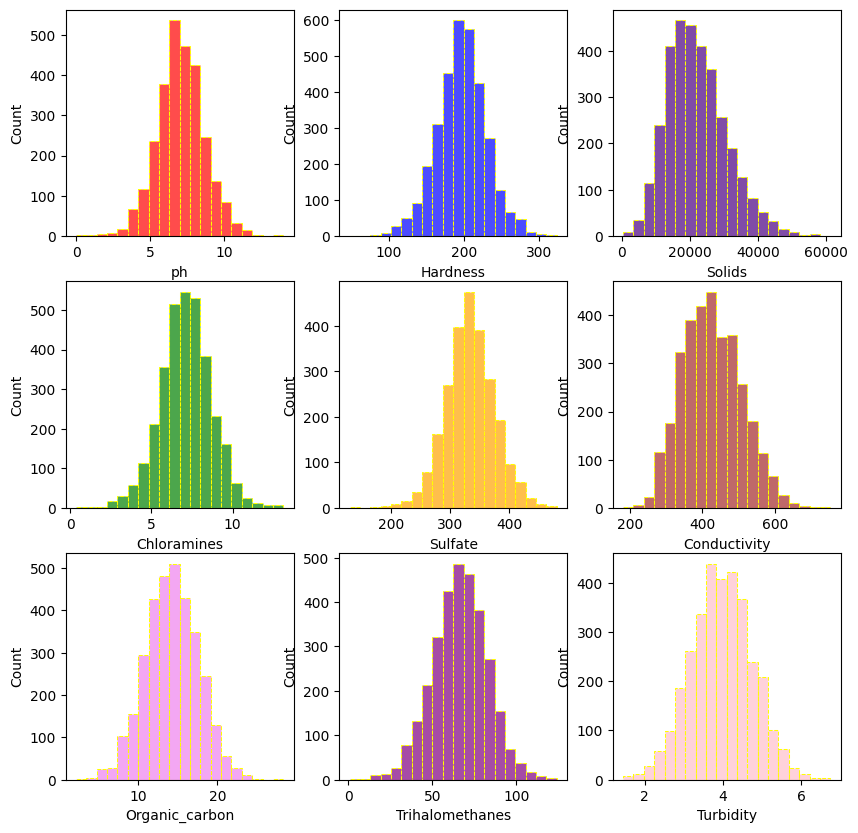

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(df['ph'],bins=20, alpha=0.7, ec='yellow',linestyle="--",color='red',ax=axes[0, 0])
sns.histplot(df['Hardness'],bins=20, alpha=0.7, ec='yellow',linestyle="--",color='blue',ax=axes[0, 1])
sns.histplot(df['Solids'],bins=20,  alpha=0.7, ec='yellow',linestyle="--",color='indigo',ax=axes[0, 2])
sns.histplot(df['Chloramines'],bins=20,  alpha=0.7, ec='yellow',linestyle="--",color='green',ax=axes[1, 0])
sns.histplot(df['Sulfate'],bins=20, alpha=0.7, ec='yellow',linestyle="--",color='orange',ax=axes[1, 1])
sns.histplot(df['Conductivity'],bins=20,alpha=0.7, ec='yellow',linestyle="--",color='brown',ax=axes[1, 2])
sns.histplot(df['Organic_carbon'],bins=20, alpha=0.7, ec='yellow',linestyle="--",color='violet',ax=axes[2, 0])
sns.histplot(df['Trihalomethanes'],bins=20, alpha=0.7, ec='yellow',linestyle="--",color='purple',ax=axes[2, 1])
sns.histplot(df['Turbidity'],bins=20, alpha=0.7, ec='yellow',linestyle="--",color='pink',ax=axes[2, 2])
plt.show()

## NOTE:
#### All features are normally distributed but solid is slightly positive skewed or approx to normal.

***<font color="pink">Use median imputation due to the presence of outliers</font>***

In [9]:
def apply_median_imputation(X_train, X_test, variables):
    median_imputer = MeanMedianImputer(imputation_method='median', variables=variables)
    median_imputer.fit(X_train)
    X_train_imputed = median_imputer.transform(X_train)
    X_test_imputed = median_imputer.transform(X_test)
    
    return X_train_imputed, X_test_imputed

In [10]:
variables=['ph','Sulfate','Trihalomethanes']
X_train_imputer, X_test_imputer = apply_median_imputation(X_train, X_test, variables)

In [11]:
X_train_imputer.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [12]:
X_test_imputer.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

***<font color="purple">3rd step: Detect Outliers</font>***

***<font color="pink">Draw box plot for outliers</font>***

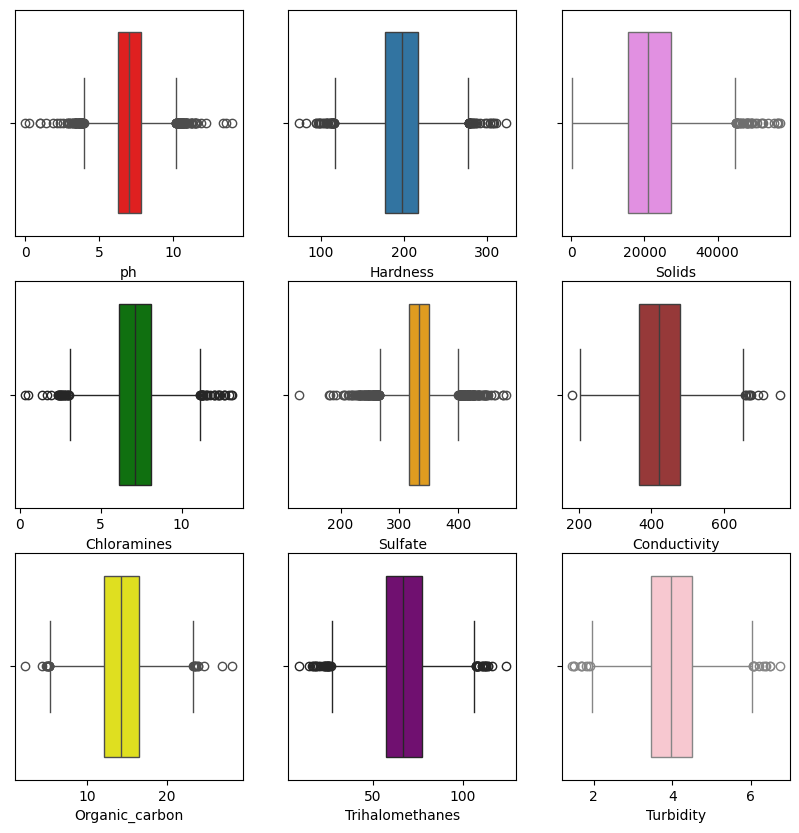

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

sns.boxplot(X_train_imputer['ph'],orient="h",color='red',ax=axes[0, 0])
sns.boxplot(X_train_imputer['Hardness'],orient="h",ax=axes[0, 1])
sns.boxplot(X_train_imputer['Solids'],orient="h",color='violet',ax=axes[0, 2])
sns.boxplot(X_train_imputer['Chloramines'],orient="h",color='green',ax=axes[1, 0])
sns.boxplot(X_train_imputer['Sulfate'],orient="h",color='orange',ax=axes[1, 1])
sns.boxplot(X_train_imputer['Conductivity'],orient="h",color='brown',ax=axes[1, 2])
sns.boxplot(X_train_imputer['Organic_carbon'],orient="h",color='yellow',ax=axes[2, 0])
sns.boxplot(X_train_imputer['Trihalomethanes'],orient="h",color='purple',ax=axes[2, 1])
sns.boxplot(X_train_imputer['Turbidity'],orient="h",color='pink',ax=axes[2, 2])

plt.show()

***<font color="purple">4th step:  Handling Outliers by IQR method</font>***

In [14]:
def remove_outliers_byCapping(df,cols):
    for col in cols:
            #df[col] = sorted(df[col])
            Q1= df[col].quantile(0.25) 
            Q3= df[col].quantile(0.75)
            IQR= Q3 - Q1

            HB=Q3 + 1.5 * IQR
            LB=Q1 - 1.5 * IQR

            df[col]= np.where(df[col] > HB,HB ,np.where(df[col] < LB,LB  ,df[col])) 
    
    return df

In [15]:
X_train = remove_outliers_byCapping(X_train_imputer,X_train_imputer.columns)
X_test= remove_outliers_byCapping(X_test_imputer,X_test_imputer.columns)

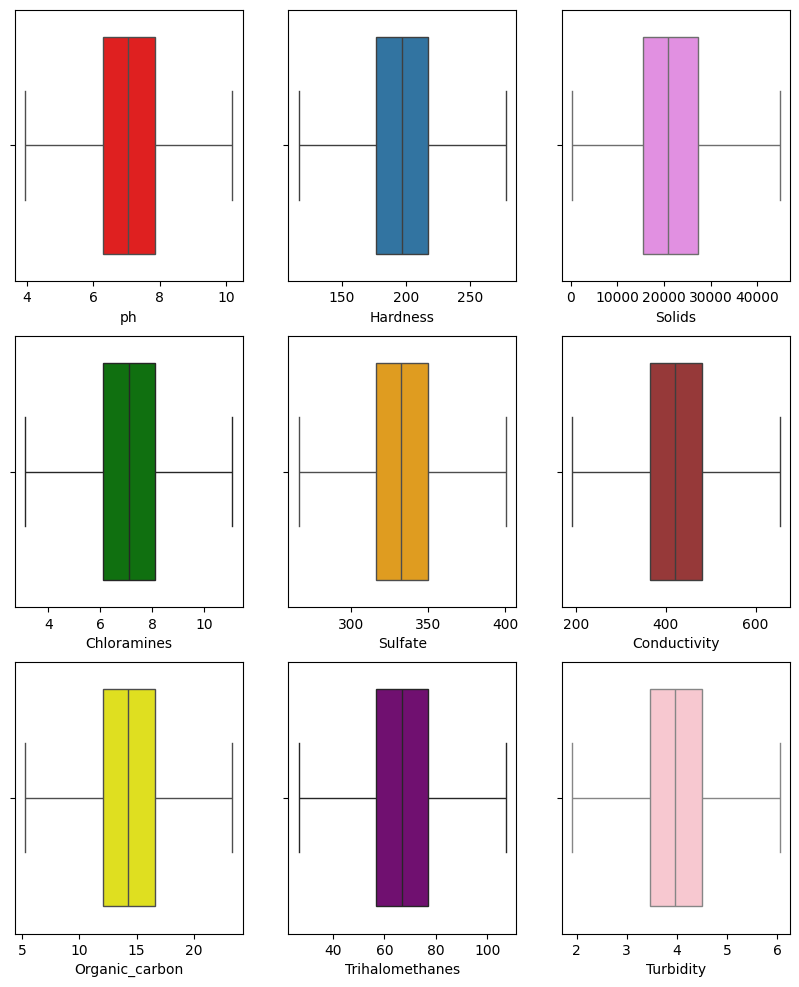

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(10, 12))

sns.boxplot(X_train['ph'],orient="h",color='red',ax=axes[0, 0])
sns.boxplot(X_train['Hardness'],orient="h",ax=axes[0, 1])
sns.boxplot(X_train['Solids'],orient="h",color='violet',ax=axes[0, 2])
sns.boxplot(X_train['Chloramines'],orient="h",color='green',ax=axes[1, 0])
sns.boxplot(X_train['Sulfate'],orient="h",color='orange',ax=axes[1, 1])
sns.boxplot(X_train['Conductivity'],orient="h",color='brown',ax=axes[1, 2])
sns.boxplot(X_train['Organic_carbon'],orient="h",color='yellow',ax=axes[2, 0])
sns.boxplot(X_train['Trihalomethanes'],orient="h",color='purple',ax=axes[2, 1])
sns.boxplot(X_train['Turbidity'],orient="h",color='pink',ax=axes[2, 2])

plt.show()

In [17]:
df.duplicated().sum()

0

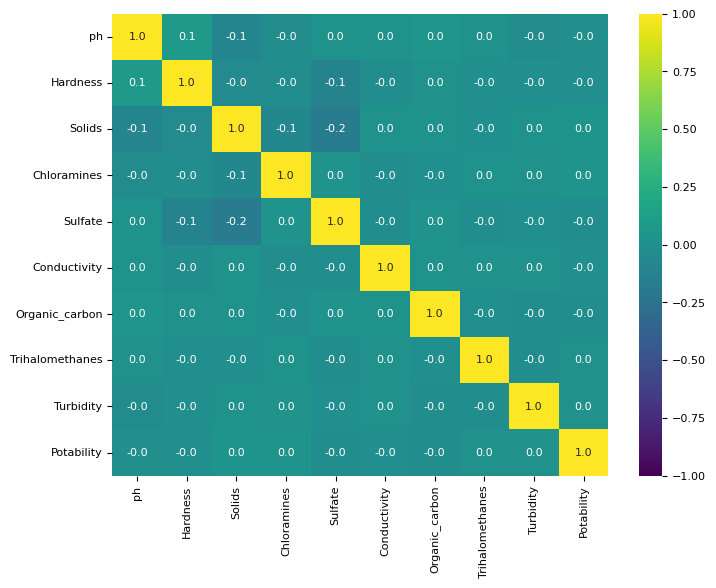

In [18]:
corr_matrix = df.corr()
plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 8})
sns.heatmap(corr_matrix, cmap = 'viridis', vmin = -1, vmax = 1,annot=True,fmt=".1f")
plt.show()

***<font color="purple">5th step: Apply Feature scaling type Standardization </font>***

In [19]:
obj_scaler = StandardScaler()
X_train_scaler = obj_scaler.fit_transform(X_train)
X_test_scaler = obj_scaler.transform(X_test)

In [20]:
X_train_scaler= pd.DataFrame(X_train_scaler,columns=X_train.columns)
X_test_scaler= pd.DataFrame(X_test_scaler,columns=X_test.columns)

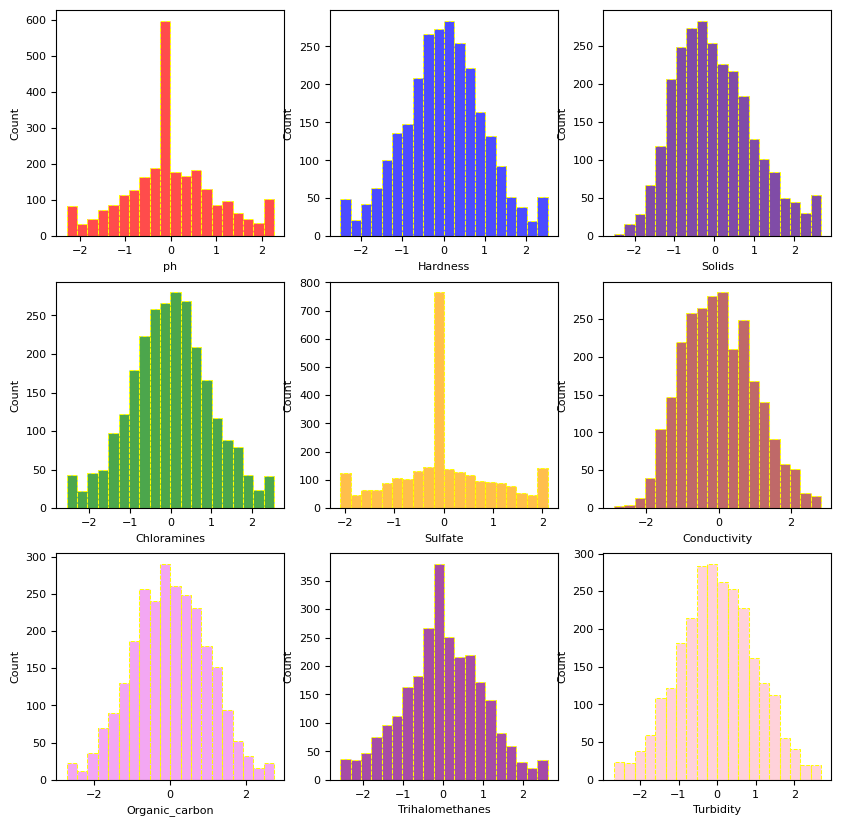

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(X_train_scaler['ph'],bins=20, alpha=0.7, ec='yellow',linestyle="--",color='red',ax=axes[0, 0])
sns.histplot(X_train_scaler['Hardness'],bins=20, alpha=0.7, ec='yellow',linestyle="--",color='blue',ax=axes[0, 1])
sns.histplot(X_train_scaler['Solids'],bins=20,  alpha=0.7, ec='yellow',linestyle="--",color='indigo',ax=axes[0, 2])
sns.histplot(X_train_scaler['Chloramines'],bins=20,  alpha=0.7, ec='yellow',linestyle="--",color='green',ax=axes[1, 0])
sns.histplot(X_train_scaler['Sulfate'],bins=20, alpha=0.7, ec='yellow',linestyle="--",color='orange',ax=axes[1, 1])
sns.histplot(X_train_scaler['Conductivity'],bins=20,alpha=0.7, ec='yellow',linestyle="--",color='brown',ax=axes[1, 2])
sns.histplot(X_train_scaler['Organic_carbon'],bins=20, alpha=0.7, ec='yellow',linestyle="--",color='violet',ax=axes[2, 0])
sns.histplot(X_train_scaler['Trihalomethanes'],bins=20, alpha=0.7, ec='yellow',linestyle="--",color='purple',ax=axes[2, 1])
sns.histplot(X_train_scaler['Turbidity'],bins=20, alpha=0.7, ec='yellow',linestyle="--",color='pink',ax=axes[2, 2])
plt.show()

## Here I am applying Machine Learning Model: 
+ Random Forest Classifier

***<font color="purple">6th step: Apply Model <font color="orange">Random Forest Classifier</font></font>***

In [22]:
obj_RF = RandomForestClassifier()
RF_model= obj_RF.fit(X_train_scaler, y_train)

In [23]:
y_pred = obj_RF.predict(X_test_scaler)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [25]:
accuracy_RF= accuracy_score(y_test,y_pred)
print(f"Accuracy of the  RandomForestClassifier()  is {accuracy_RF: .2f}")

Accuracy of the  RandomForestClassifier()  is  0.69


In [26]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       412
           1       0.66      0.35      0.46       244

    accuracy                           0.69       656
   macro avg       0.68      0.62      0.62       656
weighted avg       0.69      0.69      0.66       656



In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[369  43]
 [159  85]]


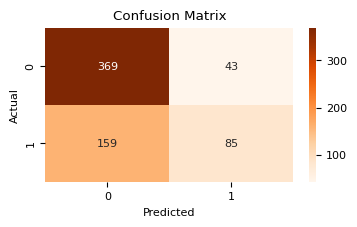

In [28]:
labels = sorted(set(y_test) | set(y_pred))
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, cmap='Oranges', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()